The choice between a z-test and a t-test depends on the characteristics of your data and the specifics of your statistical analysis. Here are guidelines on when to use each:

Z-Test:

Known Population Variance: Use a z-test when the population variance is known. This is uncommon in practice since population parameters are often not known.

Large Sample Size: If you have a large sample size (typically n > 30), you can use a z-test even if the population variance is unknown. This is due to the Central Limit Theorem, which states that the sampling distribution of the sample mean becomes approximately normal as the sample size increases.


T-Test:

Unknown Population Variance: When the population variance is unknown, or when dealing with small sample sizes (typically n < 30), use a t-test.

Small Sample Size: The t-test is particularly useful for small sample sizes because it accounts for the greater uncertainty associated with estimating the population standard deviation from a small sample.

# Z -test

### Z-Test for Single Mean

A factory has a machine that dispenses 80 mL of fluid in a bottle. An employee believes the average amount of fluid is not 80 mL. Using 40 samples, he measures the average amount dispensed by the machine to be 78 mL with a standard deviation of 2.5. (a) State the null and alternative hypotheses. (b) At a 95% confidence level, is there enough evidence to support the idea that the machine is not working properly?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Given data
sample_mean = 78
population_mean = 80
population_std_dev = 2.5
sample_size = 40

# Hypotheses
# Null Hypothesis (H0): The true mean (μ) amount dispensed by the machine is equal to 80 mL.
# Alternative Hypothesis (H1): The true mean (μ) amount dispensed by the machine is not equal to 80 mL.

# Z-test calculation
z_statistic = (sample_mean - population_mean) / (population_std_dev / np.sqrt(sample_size))

# Two-tailed test at 95% confidence level
p_value = 2 * (1 - stats.norm.cdf(np.abs(z_statistic)))

# Compare p-value with significance level (e.g., 0.05)
alpha = 0.05  # Adjusted alpha for a two-tailed test

# Generate data for the standard normal distribution
x = np.linspace(-3, 3, 1000)
y = stats.norm.pdf(x)

# Plot the standard normal distribution
plt.plot(x, y, label='Standard Normal Distribution')

# Shade the rejection regions for a two-tailed test
plt.fill_between(x, y, where=(x < -stats.norm.ppf(1 - alpha)) | (x > stats.norm.ppf(1 - alpha)),
                 color='red', alpha=0.3, label='Rejection Region')

# Plot the observed z-statistic
plt.axvline(x=z_statistic, color='blue', linestyle='--', label='Observed Z-Statistic')

# Add labels and title
plt.title('Two-Tailed Z-Test Hypothesis Test')
plt.xlabel('Z-Score (Standardized Statistic)')
plt.ylabel('Probability Density Function')

# Add annotations for z-score, critical score, p-value, and alpha
plt.annotate(f'Observed Z-Statistic: {z_statistic:.2f}', xy=(z_statistic, 0.02), xytext=(z_statistic - 2, 0.15),
             arrowprops=dict(facecolor='blue', shrink=0.05), color='blue')
plt.annotate(f'Critical Z-Values: {stats.norm.ppf(1 - alpha):.2f} and {-stats.norm.ppf(1 - alpha):.2f}',
             xy=(-stats.norm.ppf(1 - alpha), 0.02), xytext=(-stats.norm.ppf(1 - alpha) - 2, 0.1),
             arrowprops=dict(facecolor='red', shrink=0.05), color='red')
plt.annotate(f'Alpha Value: {alpha}', xy=(-stats.norm.ppf(1 - alpha), 0.02), xytext=(-stats.norm.ppf(1 - alpha) - 2, 0.25),
             arrowprops=dict(facecolor='purple', shrink=0.05), color='purple')
plt.annotate(f'Alpha Value: {alpha}', xy=(stats.norm.ppf(1 - alpha), 0.02), xytext=(stats.norm.ppf(1 - alpha) + 0.5, 0.1),
             arrowprops=dict(facecolor='purple', shrink=0.05), color='purple')

# Display the legend
plt.legend()

# Display the plot
plt.show()

# Conclusion based on p-value and alpha
if p_value < alpha:
    print("Reject the null hypothesis: There is enough evidence to suggest that the machine is not working properly.")
else:
    print("Fail to reject the null hypothesis: There is not enough evidence to conclude that the machine is not working properly.")


Reject the null hypothesis: There is enough evidence to suggest that the machine is not working properly.


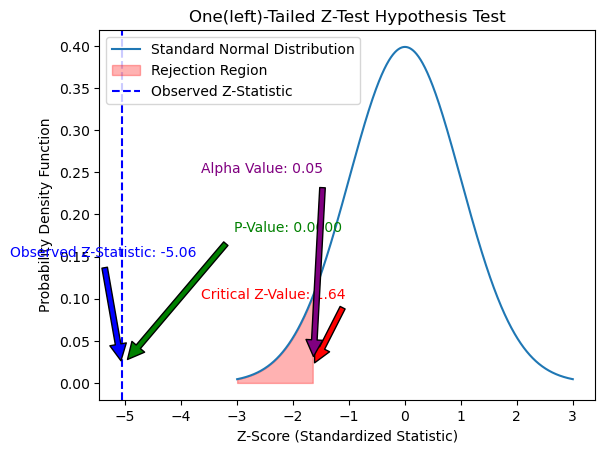

Reject the null hypothesis: There is enough evidence to suggest that the true mean weight is less than 80.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


# Null Hypothesis (H0): The true mean (μ) weight is equal to 80.
# Alternative Hypothesis (H1): The true mean (μ) weight is less than 80.

# Given data
sample_mean = 78
population_mean = 80
population_std_dev = 2.5
sample_size = 40

# Z-test calculation
z_statistic = (sample_mean - population_mean) / (population_std_dev / np.sqrt(sample_size))

# One-tailed test at 95% confidence level
p_value = stats.norm.cdf(z_statistic)

# Compare p-value with significance level (e.g., 0.05)
alpha = 0.05

# Generate data for the standard normal distribution
x = np.linspace(-3, 3, 1000)
y = stats.norm.pdf(x)

# Plot the standard normal distribution
plt.plot(x, y, label='Standard Normal Distribution')

# Shade the rejection region for a one-tailed test
plt.fill_between(x, y, where=(x < -stats.norm.ppf(1 - alpha)), color='red', alpha=0.3, label='Rejection Region')

# Plot the observed z-statistic
plt.axvline(x=z_statistic, color='blue', linestyle='--', label='Observed Z-Statistic')

# Add labels and title
plt.title('One(left)-Tailed Z-Test Hypothesis Test')
plt.xlabel('Z-Score (Standardized Statistic)')
plt.ylabel('Probability Density Function')

# Add annotations for z-score, critical score, and p-value
plt.annotate(f'Observed Z-Statistic: {z_statistic:.2f}', xy=(z_statistic, 0.02), xytext=(z_statistic - 2, 0.15),
             arrowprops=dict(facecolor='blue', shrink=0.05), color='blue')
plt.annotate(f'Critical Z-Value: {stats.norm.ppf(1 - alpha):.2f}', xy=(-stats.norm.ppf(1 - alpha), 0.02),
             xytext=(-stats.norm.ppf(1 - alpha) - 2, 0.1), arrowprops=dict(facecolor='red', shrink=0.05), color='red')
plt.annotate(f'P-Value: {p_value:.4f}', xy=(z_statistic, 0.02), xytext=(z_statistic + 2, 0.18),
             arrowprops=dict(facecolor='green', shrink=0.05), color='green')
plt.annotate(f'Alpha Value: {alpha}', xy=(-stats.norm.ppf(1 - alpha), 0.02), xytext=(-stats.norm.ppf(1 - alpha) - 2, 0.25),
             arrowprops=dict(facecolor='purple', shrink=0.05), color='purple')

# Display the legend
plt.legend()

# Display the plot
plt.show()


# Conclusion based on p-value and alpha
if p_value < alpha:
    print("Reject the null hypothesis: There is enough evidence to suggest that the true mean weight is less than 80.")
else:
    print("Fail to reject the null hypothesis: There is not enough evidence to conclude that the true mean weight is less than 80.")


###  Z-Test for Two Means (Independent Samples)

Suppose we want to compare the average scores of two groups of students (Group A and Group B) in a standardized mathematics test to determine if there is a significant difference in their performance.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Given data
group_a_scores = np.array([78, 82, 85, 88, 90])
group_b_scores = np.array([85, 88, 92, 95, 98])

# Null Hypothesis (H0): The mean scores of Group A and Group B are equal (μA = μB).
# Alternative Hypothesis (H1): The mean scores of Group A and Group B are not equal (μA ≠ μB).


# Z-Test for Two Means (Independent Samples)
z_statistic, p_value = stats.ttest_ind(group_a_scores, group_b_scores)

# Generate data for the standard normal distribution
x = np.linspace(-3, 3, 1000)
y = stats.norm.pdf(x)

# Plot the standard normal distribution
plt.plot(x, y, label='Standard Normal Distribution')

# Shade the rejection region for a two-tailed test
alpha = 0.05
z_critical = stats.norm.ppf(1 - alpha / 2)
plt.fill_between(x, y, where=(x < -z_critical) | (x > z_critical),
                 color='red', alpha=0.3, label='Rejection Region')

# Plot the observed z-statistic
plt.axvline(x=z_statistic, color='blue', linestyle='--', label='Observed Z-Statistic')

# Add labels and title
plt.title('Z-Test for Two Means (Independent Samples)')
plt.xlabel('Z-Score (Standardized Statistic)')
plt.ylabel('Probability Density Function')

# Add annotations for z-score, critical score, p-value, and alpha
plt.annotate(f'Observed Z-Statistic: {z_statistic:.2f}', xy=(z_statistic, 0.02), xytext=(z_statistic - 2, 0.15),
             arrowprops=dict(facecolor='blue', shrink=0.05), color='blue')
plt.annotate(f'Critical Z-Values: ±{z_critical:.2f}', xy=(-z_critical, 0.02),
             xytext=(-z_critical - 2, 0.1), arrowprops=dict(facecolor='red', shrink=0.05), color='red')
plt.annotate(f'P-Value: {p_value:.4f}', xy=(z_statistic, 0.02), xytext=(z_statistic + 2, 0.18),
             arrowprops=dict(facecolor='green', shrink=0.05), color='green')

# Display the legend
plt.legend()

# Display the plot
plt.show()


# Compare p-value with significance level (e.g., 0.05)
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is enough evidence to suggest a significant difference in mean scores.")
else:
    print("Fail to reject the null hypothesis: There is not enough evidence to conclude a significant difference in mean scores.")


Fail to reject the null hypothesis: There is not enough evidence to conclude a significant difference in mean scores.


###  Z-Test for Two Means (Dependent Samples)

Suppose we want to assess whether there is a significant difference in the scores of students before and after a training program. We have the scores of the same group of students before and after the training.

Data:

Before Training: [78, 82, 85, 88, 90]
After Training: [85, 88, 92, 95, 98]

Hypotheses:

Null Hypothesis (H0): The mean scores before and after training are equal (μ_before = μ_after).

Alternative Hypothesis (H1): The mean scores before and after training are not equal (μ_before ≠ μ_after).

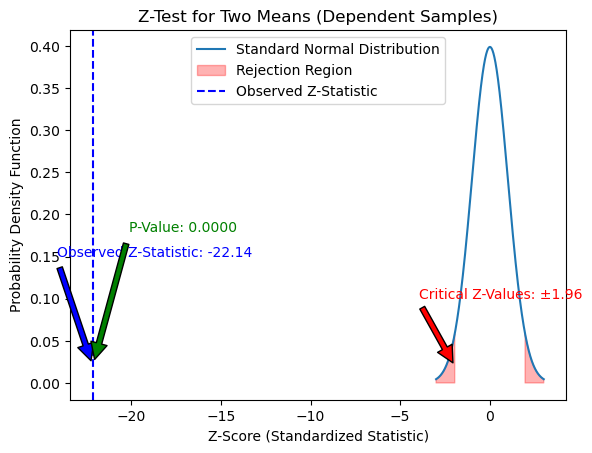

Reject the null hypothesis: There is enough evidence to suggest a significant difference.


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Given data
scores_before = np.array([78, 82, 85, 88, 90])
scores_after = np.array([85, 88, 92, 95, 98])

# Z-Test for Two Means (Dependent Samples)
z_statistic, p_value = stats.ttest_rel(scores_before, scores_after)

# Generate data for the standard normal distribution
x = np.linspace(-3, 3, 1000)
y = stats.norm.pdf(x)

# Plot the standard normal distribution
plt.plot(x, y, label='Standard Normal Distribution')

# Shade the rejection region for a two-tailed test
alpha = 0.05
z_critical = stats.norm.ppf(1 - alpha / 2)
plt.fill_between(x, y, where=(x < -z_critical) | (x > z_critical),
                 color='red', alpha=0.3, label='Rejection Region')

# Plot the observed z-statistic
plt.axvline(x=z_statistic, color='blue', linestyle='--', label='Observed Z-Statistic')

# Add labels and title
plt.title('Z-Test for Two Means (Dependent Samples)')
plt.xlabel('Z-Score (Standardized Statistic)')
plt.ylabel('Probability Density Function')

# Add annotations for z-score, critical score, p-value, and alpha
plt.annotate(f'Observed Z-Statistic: {z_statistic:.2f}', xy=(z_statistic, 0.02), xytext=(z_statistic - 2, 0.15),
             arrowprops=dict(facecolor='blue', shrink=0.05), color='blue')
plt.annotate(f'Critical Z-Values: ±{z_critical:.2f}', xy=(-z_critical, 0.02),
             xytext=(-z_critical - 2, 0.1), arrowprops=dict(facecolor='red', shrink=0.05), color='red')
plt.annotate(f'P-Value: {p_value:.4f}', xy=(z_statistic, 0.02), xytext=(z_statistic + 2, 0.18),
             arrowprops=dict(facecolor='green', shrink=0.05), color='green')

# Display the legend
plt.legend()

# Display the plot
plt.show()

# Display the conclusion based on the p-value
alpha = 0.05
if p_value < alpha:
    print(f'Reject the null hypothesis: There is enough evidence to suggest a significant difference.')
else:
    print(f'Fail to reject the null hypothesis: There is not enough evidence to suggest a significant difference.')


### Z-Test for Proportions

we want to compare the proportion of customers who made a purchase before and after a marketing campaign.

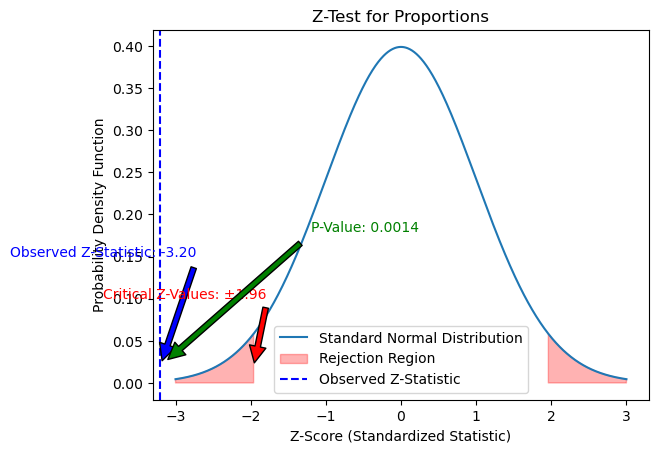

Reject the null hypothesis: There is enough evidence to suggest a significant difference in proportions.


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.proportion import proportions_ztest

# Given data
success_before = 50  # Number of successes (purchases) before the campaign
total_before = 200   # Total number of trials before the campaign

success_after = 80   # Number of successes (purchases) after the campaign
total_after = 200    # Total number of trials after the campaign

"""
Null Hypothesis (H0):
The proportion of customers making a purchase before the marketing campaign is equal to the proportion of customers making a purchase after the campaign.

Alternative Hypothesis (H1):
The proportion of customers making a purchase before the marketing campaign is not equal to the proportion of customers making a purchase after the campaign.

Mathematically:
H0: p1 = p2
H1: p1 ≠ p2

"""

# Z-Test for Proportions
count = np.array([success_before, success_after])
nobs = np.array([total_before, total_after])
z_statistic, p_value = proportions_ztest(count, nobs)

# Generate data for the standard normal distribution
x = np.linspace(-3, 3, 1000)
y = stats.norm.pdf(x)

# Plot the standard normal distribution
plt.plot(x, y, label='Standard Normal Distribution')

# Shade the rejection region for a two-tailed test
alpha = 0.05
z_critical = stats.norm.ppf(1 - alpha / 2)
plt.fill_between(x, y, where=(x < -z_critical) | (x > z_critical),
                 color='red', alpha=0.3, label='Rejection Region')

# Plot the observed z-statistic
plt.axvline(x=z_statistic, color='blue', linestyle='--', label='Observed Z-Statistic')

# Add labels and title
plt.title('Z-Test for Proportions')
plt.xlabel('Z-Score (Standardized Statistic)')
plt.ylabel('Probability Density Function')

# Add annotations for z-score, critical score, p-value, and alpha
plt.annotate(f'Observed Z-Statistic: {z_statistic:.2f}', xy=(z_statistic, 0.02), xytext=(z_statistic - 2, 0.15),
             arrowprops=dict(facecolor='blue', shrink=0.05), color='blue')
plt.annotate(f'Critical Z-Values: ±{z_critical:.2f}', xy=(-z_critical, 0.02),
             xytext=(-z_critical - 2, 0.1), arrowprops=dict(facecolor='red', shrink=0.05), color='red')
plt.annotate(f'P-Value: {p_value:.4f}', xy=(z_statistic, 0.02), xytext=(z_statistic + 2, 0.18),
             arrowprops=dict(facecolor='green', shrink=0.05), color='green')


# Display the legend
plt.legend()

# Display the plot
plt.show()
# Display the conclusion based on the p-value
alpha = 0.05
if p_value < alpha:
    print(f'Reject the null hypothesis: There is enough evidence to suggest a significant difference in proportions.')
else:
    print(f'Fail to reject the null hypothesis: There is not enough evidence to suggest a significant difference in proportions.')
